# Following Along a YouTube Tutorial Using the NFL API
https://www.youtube.com/watch?v=q6PDM_vq4us 


### Part 1

Download the logo image files, create a DataFrame of the team abbreviations that references the path of the logo image file

In [7]:
# Dependencies
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [8]:
# Pull the team description
logos = nfl.import_team_desc()
logos.head()

,team_abbr,team_name,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,ARI,Arizona Cardinals,3800,Cardinals,NFC,NFC West,#97233F,#000000,#ffb612,#a5acaf,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,ATL,Atlanta Falcons,200,Falcons,NFC,NFC South,#A71930,#000000,#a5acaf,#a30d2d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,BUF,Buffalo Bills,610,Bills,AFC,AFC East,#00338D,#C60C30,#0c2e82,#d50a0a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,CAR,Carolina Panthers,750,Panthers,NFC,NFC South,#0085CA,#000000,#bfc0bf,#0085ca,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500-dark...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...


In [9]:
# We only need the necessary columns for our logos df
logos = logos[['team_abbr', 'team_logo_espn']]
logos

,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...
5,CHI,https://a.espncdn.com/i/teamlogos/nfl/500/chi.png
6,CIN,https://a.espncdn.com/i/teamlogos/nfl/500/cin.png
7,CLE,https://a.espncdn.com/i/teamlogos/nfl/500/cle.png
8,DAL,https://a.espncdn.com/i/teamlogos/nfl/500/dal.png
9,DEN,https://a.espncdn.com/i/teamlogos/nfl/500/den.png


In [10]:
# Create an empty list for the logo file paths
logo_paths = []

# Create an empty list for the team abbreviations
team_abbr = []

# Create a folder for the image files if it doesn't exist
if not os.path.exists('logos'):
    os.makedirs("logos")

In [11]:
# Pull the team logos from the URL and save them in the logos folder, save the files paths too
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

In [12]:
# Create a dictionary to put logo_paths and team_abbr in 
data = {'Team Abbr' : team_abbr, 'Logo Path' : logo_paths}

# Create a DF from this dict
logo_df = pd.DataFrame(data)

logo_df.head()

,Team Abbr,Logo Path
0,ARI,logos/ARI.tif
1,ATL,logos/ATL.tif
2,BAL,logos/BAL.tif
3,BUF,logos/BUF.tif
4,CAR,logos/CAR.tif


### Part 2
Load the NFL data, clean it, and join it with the logo df

In [13]:
# load the NFL 2021 PBP data
pbp_df = nfl.import_pbp_data([2021])

2021 done.
Downcasting floats.


In [14]:
pbp_df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0.0,0.0
1,40.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,None,None,NaN,None,NaN,43616;43680;52416;49410;53634;43556;53639;4625...,00-0032560;00-0036356;00-0035705;00-0036896;00...,00-0032496;00-0036652;00-0032355;00-0033455;00...,11.0,11.0
2,55.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,52416;49410;38629;53445;43334;47816;47848;3853...,00-0029413;00-0032764;00-0029701;00-0027648;00...,00-0036356;00-0035705;00-0036933;00-0035236;00...,11.0,11.0
3,76.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",4.0,52416;49410;38629;53445;43334;47816;47848;3853...,00-0029413;00-0032764;00-0029701;00-0027648;00...,00-0036356;00-0035705;00-0036933;00-0035236;00...,11.0,11.0
4,100.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"2 DL, 4 LB, 5 DB",4.0,52416;42401;49410;43556;38629;40008;47816;4784...,00-0032355;00-0029413;00-0029701;00-0033455;00...,00-0036356;00-0032127;00-0035705;00-0030528;00...,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50707,3930.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,LA,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",NaN,43298;47844;42500;43045;32230;52588;47917;4334...,,,0.0,0.0
50708,3951.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,None,None,None,...,None,None,NaN,None,NaN,,,,0.0,0.0
50709,3968.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,LA,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",3.0,43298;42500;47844;43045;32230;52588;47917;4334...,,,0.0,0.0
50710,3990.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,LA,away,CIN,...,None,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",NaN,52544;42400;46146;43299;46180;44872;46633;4612...,,,0.0,0.0


#### Part 2a
Prepping the data for Air Yards vs YAC visualization

In [15]:
# Fileter down to just the possession team, air yards, and YAC
air_yards_yac_df = pbp_df[['posteam', 'air_yards', 'yards_after_catch']]

In [16]:
# Group by the possession team and sum
air_yards_yac_df = air_yards_yac_df.groupby('posteam').sum()

# Retain the index
air_yards_yac_df = air_yards_yac_df.reset_index()

# Rename the posteam column to team_abbr (in order to easily join later)
air_yards_yac_df = air_yards_yac_df.rename(columns={'posteam' : 'Team Abbr'})

air_yards_yac_df.head()

,Team Abbr,air_yards,yards_after_catch
0,ARI,4692.0,2352.0
1,ATL,4142.0,1733.0
2,BAL,5242.0,1712.0
3,BUF,5883.0,1977.0
4,CAR,4425.0,1823.0


In [17]:
# Join air yards / YAC df with the logo df
vis_df1 = pd.merge(air_yards_yac_df, logo_df, on='Team Abbr')

vis_df1.head()

,Team Abbr,air_yards,yards_after_catch,Logo Path
0,ARI,4692.0,2352.0,logos/ARI.tif
1,ATL,4142.0,1733.0,logos/ATL.tif
2,BAL,5242.0,1712.0,logos/BAL.tif
3,BUF,5883.0,1977.0,logos/BUF.tif
4,CAR,4425.0,1823.0,logos/CAR.tif


#### Part 2b
Prepping data for EPA/run vs. EPA/pass visualization

Will do later

### Part 3
Create the visualizations with NFL logos using our visualization df

In [18]:
# define a function for getting the image path and loading it into the visualization
def getImage(path):
    return OffsetImage(plt.imread(path, format='tif'), zoom = .15)

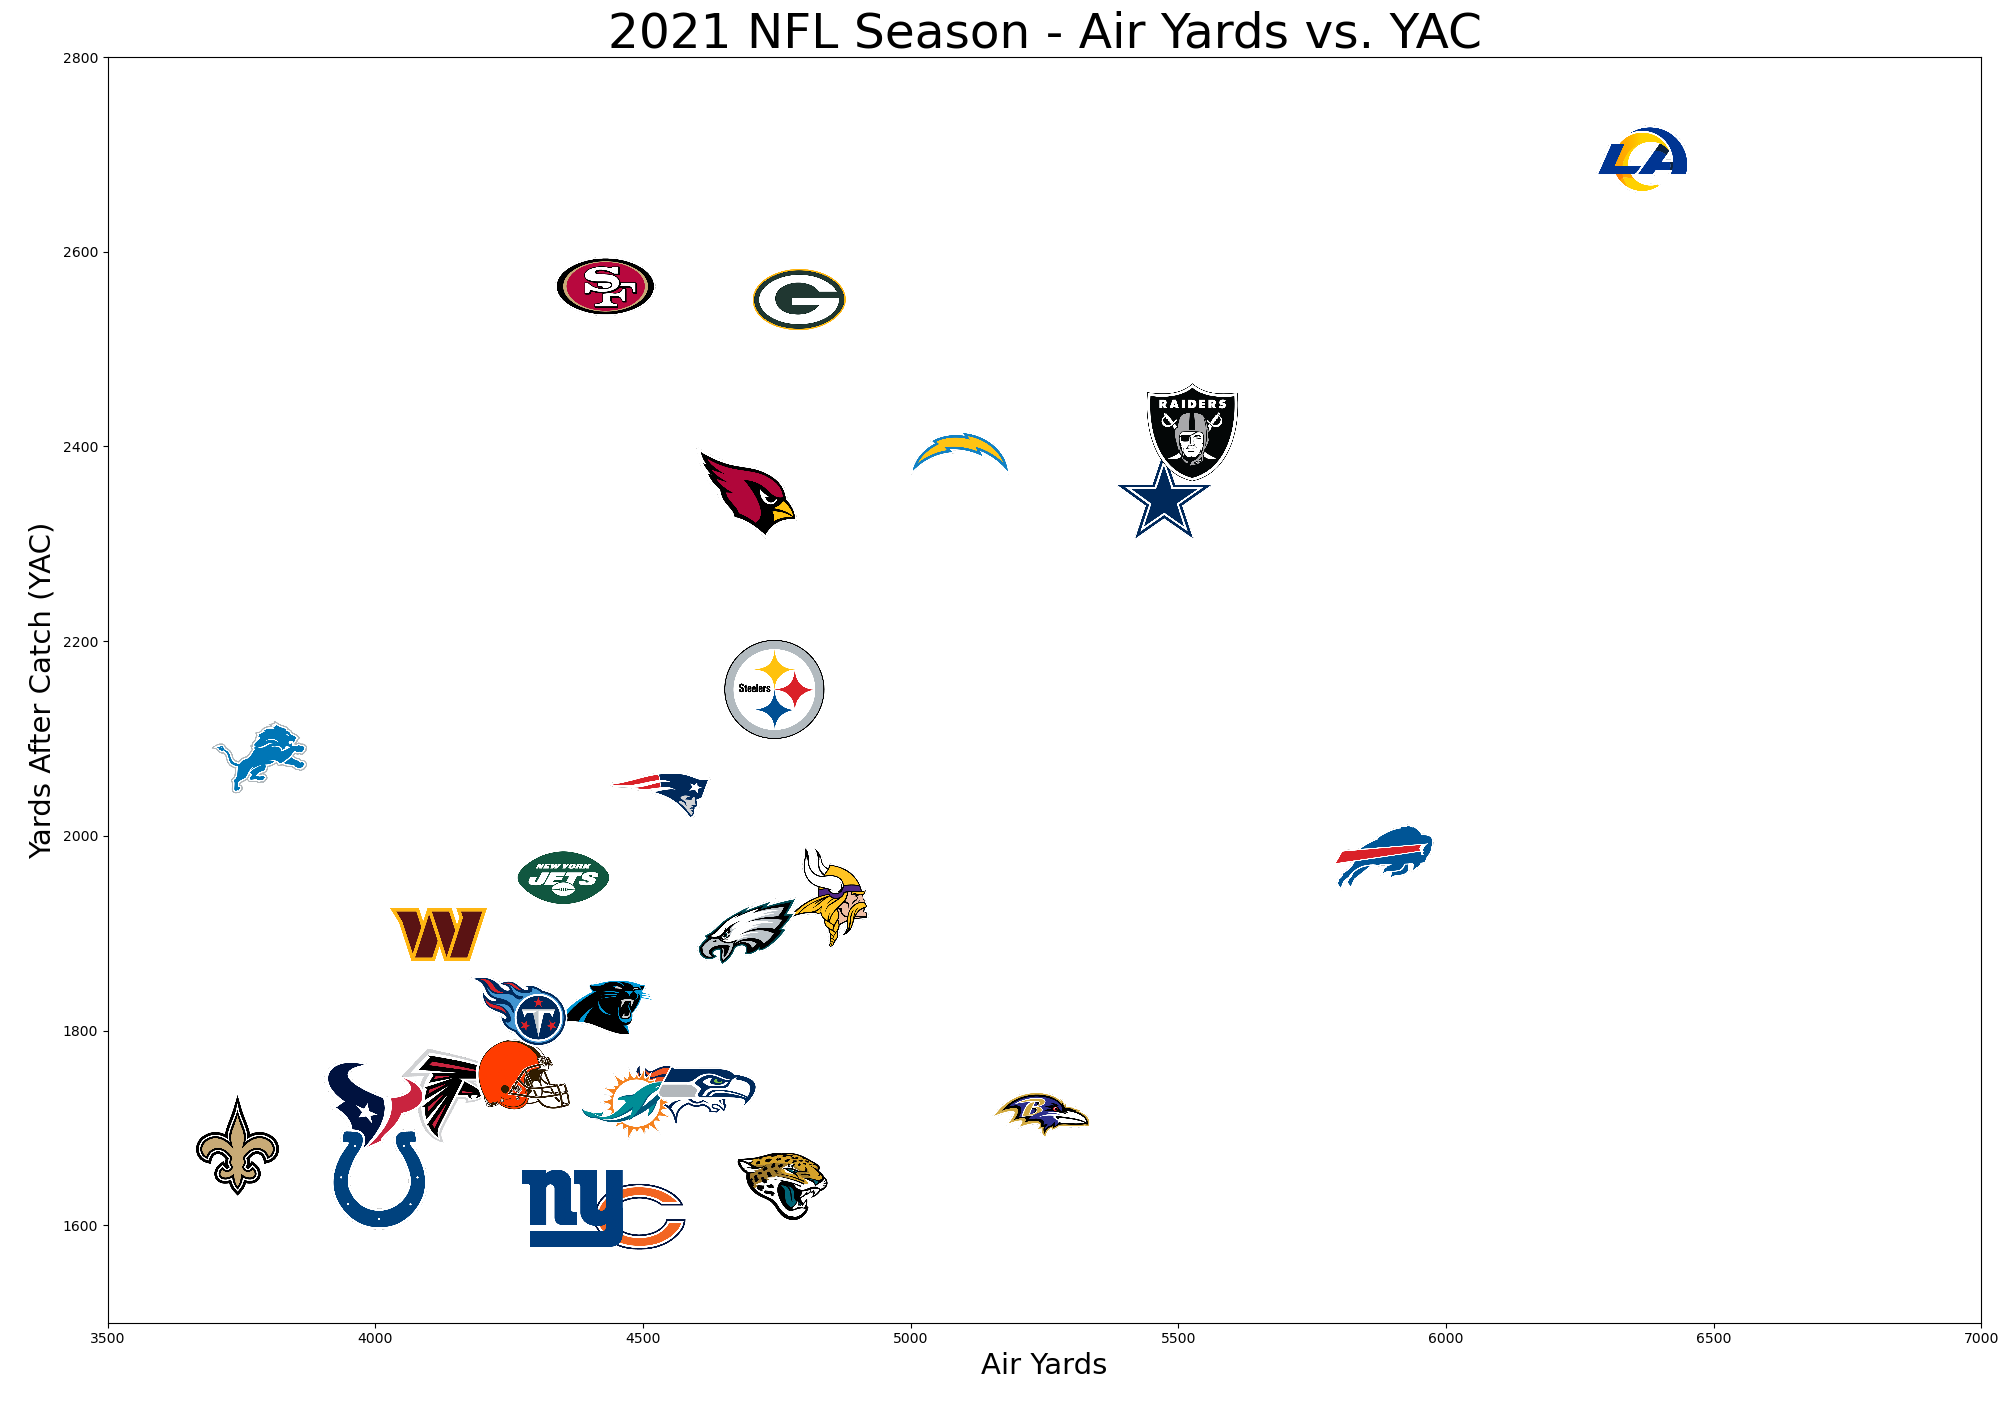

In [19]:
# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True

# Define the x and y variables
x = vis_df1['air_yards']
y = vis_df1['yards_after_catch']

# Define the image paths
paths = vis_df1['Logo Path']

# Define the plot 
fig, ax = plt.subplots()

# Load the data into the plot
for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon = False)
    ax.add_artist(ab)

# Plot parameters
plt.xlim(3500, 7000);
plt.ylim(1500, 2800);
plt.title("2021 NFL Season - Air Yards vs. YAC", fontdict={'fontsize': 35});
plt.xlabel("Air Yards", fontdict={'fontsize' : 21});
plt.ylabel("Yards After Catch (YAC)", fontdict={'fontsize' : 21});